In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
benefatcor_data = pd.read_csv('BenefactorsData.csv')
benefatcor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      278386 non-null  int64 
 1   UserID          278386 non-null  int64 
 2   Gender          278149 non-null  object
 3   State           278386 non-null  object
 4   BirthDate       221817 non-null  object
 5   ReferralSource  278386 non-null  object
dtypes: int64(2), object(4)
memory usage: 12.7+ MB


In [3]:
benefatcor_data.drop(columns='Unnamed: 0', axis= 1)

,UserID,Gender,State,BirthDate,ReferralSource
0,3,زن,تهران,1363-08-16,Acquaintances
1,8,مرد,تهران,1364-06-24,Acquaintances
2,14,مرد,تهران,1356-07-07,Acquaintances
3,17,زن,تهران,1325-07-23,Acquaintances
4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...
278381,262139,مرد,تهران,1357-04-10,Application
278382,262140,مرد,تهران,1354-10-01,Application
278383,262141,مرد,فارس,1373-05-31,Application
278384,262142,زن,البرز,NaN,Advertisements


In [4]:
transaction_data = pd.read_csv('TransactionalData.csv')
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490797 entries, 0 to 1490796
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Unnamed: 0     1490797 non-null  int64 
 1   TransID        1490797 non-null  int64 
 2   UserID         1490797 non-null  int64 
 3   PaymentDate    1490797 non-null  object
 4   PaymentAmount  1490797 non-null  int64 
 5   SupportType    1490797 non-null  object
dtypes: int64(4), object(2)
memory usage: 68.2+ MB


In [5]:
filterered_data = transaction_data[(transaction_data['PaymentAmount'] > 1000) & (transaction_data['SupportType']== 'Membership Fee')].drop(columns='Unnamed: 0', axis= 1)
filterered_data

,TransID,UserID,PaymentDate,PaymentAmount,SupportType
0,850001,174731,2016-03-20,200000,Membership Fee
2,850003,145833,2016-03-20,50000,Membership Fee
3,850004,177032,2016-03-20,22000,Membership Fee
4,850005,147147,2016-03-20,50000,Membership Fee
5,850006,113029,2016-03-20,200000,Membership Fee
...,...,...,...,...,...
1490789,2340797,262302,2018-09-08,50000,Membership Fee
1490790,2340798,261466,2018-09-08,2000,Membership Fee
1490791,2340799,255011,2018-09-08,30000,Membership Fee
1490793,2340801,278235,2018-09-08,10000,Membership Fee


In [6]:
agg_data = filterered_data.groupby(['UserID','PaymentDate']).agg({'PaymentAmount':'sum',
                                                                   'TransID':'count' }).reset_index()
agg_data

,UserID,PaymentDate,PaymentAmount,TransID
0,0,2016-09-13,300000,1
1,0,2017-09-13,500000,1
2,1,2018-06-15,150000,1
3,3,2016-08-11,40000,1
4,3,2016-09-24,50000,1
...,...,...,...,...
1016897,278376,2018-09-07,10000,1
1016898,278377,2018-09-08,10000,1
1016899,278378,2018-09-08,50000,1
1016900,278379,2018-09-08,20000,1


In [7]:
summary_of_payment = transaction_data.groupby('SupportType').agg(Members=('SupportType','count'),
                                                                Total_Payment=('PaymentAmount','sum'
                                                                               )
                                                                )
summary_of_payment = summary_of_payment.sort_values(by='Total_Payment',ascending=False)
summary = summary_of_payment.style.format("{:,}")
summary

,Members,Total_Payment
SupportType,,
Household Fund,"320,706","621,580,067,126"
Cash,"77,267","280,804,124,368"
Membership Fee,"1,040,930","246,844,482,188"
Financial Aid,"21,070","203,653,891,350"
Product Purchase,"30,824","103,369,849,580"


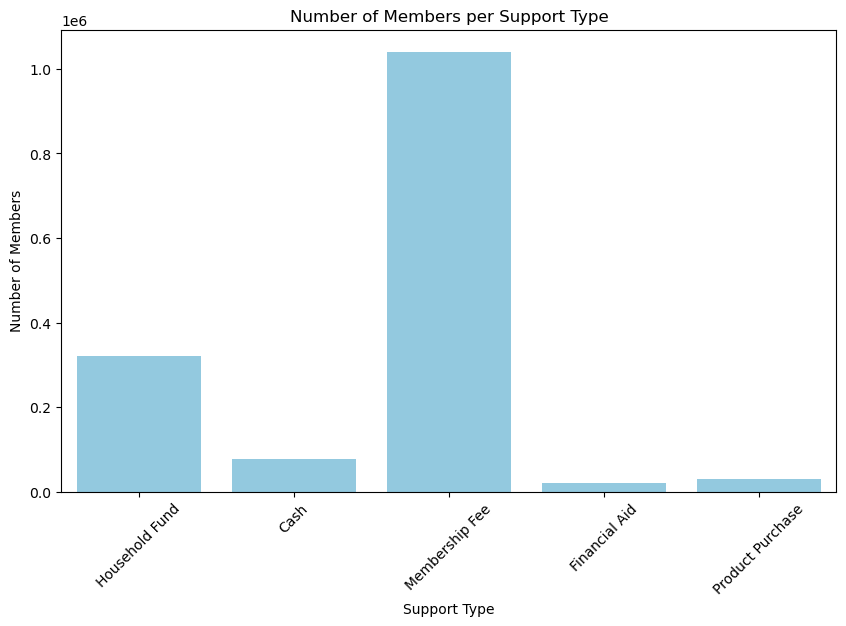

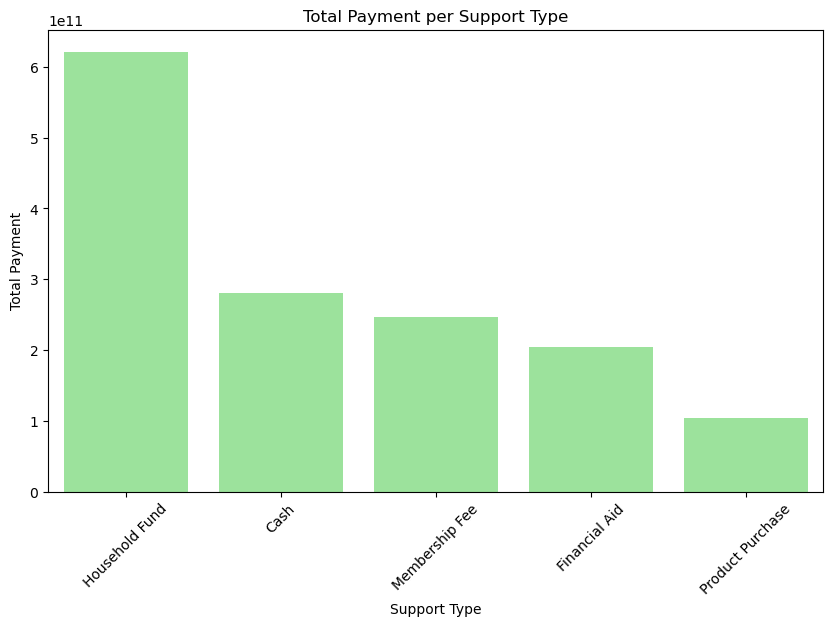

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure summary_of_payment is defined and contains the necessary columns
# Example:
# summary_of_payment = pd.DataFrame({
#     'SupportType': ['Type1', 'Type2', 'Type3'],
#     'Members': [100, 150, 200],
#     'Total_Payment': [10000, 15000, 20000]
# })

# Check for missing data and handle it if necessary
if summary_of_payment.isnull().any().any():
    summary_of_payment = summary_of_payment.dropna().sort_values(ascending=False)  # or use another method to handle missing data

# Plotting the number of members per SupportType using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SupportType', y='Members', data=summary_of_payment, color='skyblue')
plt.xlabel('Support Type')
plt.ylabel('Number of Members')
plt.title('Number of Members per Support Type')
plt.xticks(rotation=45)
plt.show()

# Plotting the total payment per SupportType using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='SupportType', y='Total_Payment', data=summary_of_payment, color='lightgreen')
plt.xlabel('Support Type')
plt.ylabel('Total Payment')
plt.title('Total Payment per Support Type')
plt.xticks(rotation=45)
plt.show()


In [9]:
agg_data['PaymentDate'] = pd.to_datetime(agg_data['PaymentDate'])

In [10]:
last_date = agg_data['PaymentDate'].max()

In [11]:
final_agg = agg_data.groupby('UserID').agg(
    R =('PaymentDate', lambda x: (last_date-x.max()).days),
    F =('PaymentDate','count'),
    M =("PaymentAmount",'sum'),
    D =('PaymentDate', lambda x: (x.max()-x.min()).days) 
).reset_index()

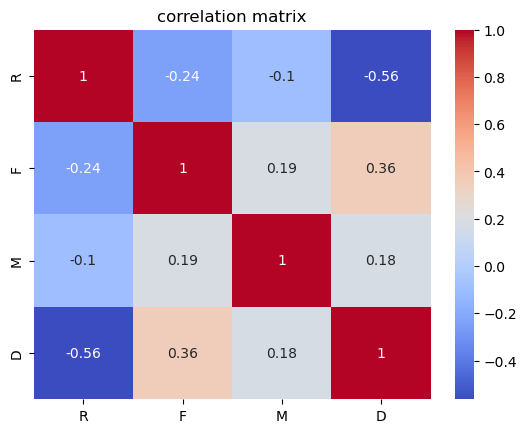

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = final_agg[['R','F', 'M', 'D']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation matrix')
plt.show;


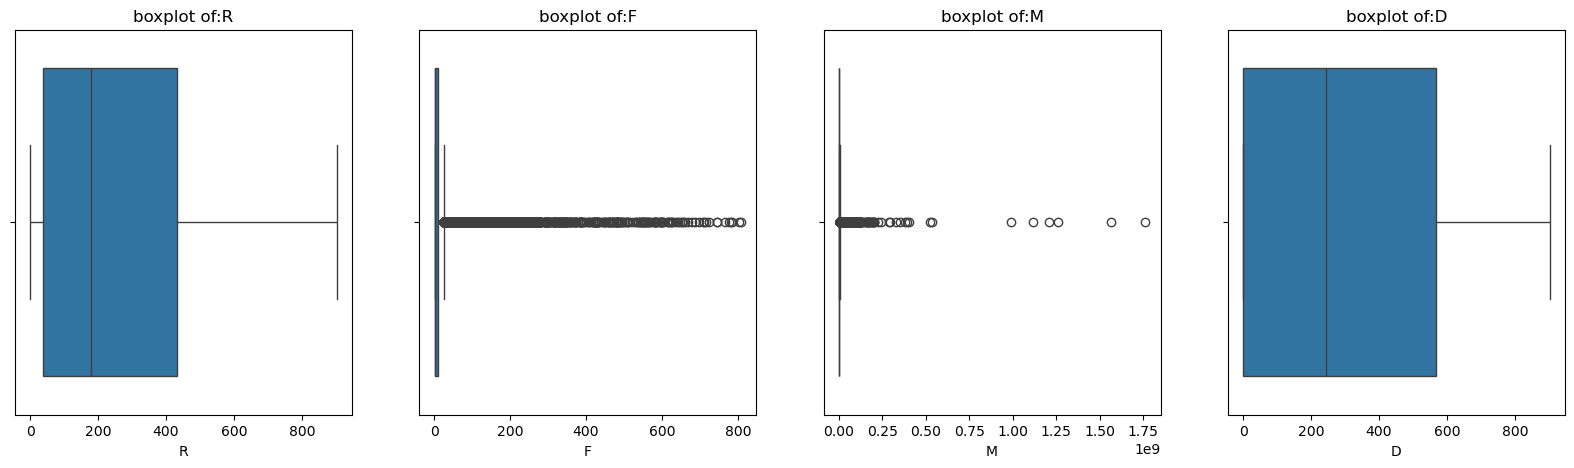

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

box_cloumns = ['R','F', 'M', 'D']
fig, axes = plt.subplots(1, len(box_cloumns), figsize=(20,5), sharey=True)

for i,col in enumerate(box_cloumns):
    sns.boxplot(data=final_agg, x=col, ax=axes[i])
    axes[i].set_title(f'boxplot of:{col}')
plt.tight_layout
plt.show;


In [14]:
skewness = final_agg[['R', 'F', 'M', 'D']].skew().to_frame("skewness").T
kurtosis = final_agg[['R', 'F', 'M', 'D']].kurtosis().to_frame('kurtosis').T
describe = final_agg[['R','F','M','D']].describe()
result = pd.concat([describe, skewness, kurtosis])

print(result)

                     R             F             M             D
count     94278.000000  94278.000000  9.427800e+04  94278.000000
mean        259.487399     10.786207  2.618056e+06    312.895607
std         249.373458     29.475161  1.316884e+07    306.942116
min           0.000000      1.000000  1.100000e+03      0.000000
25%          38.000000      1.000000  1.500000e+05      0.000000
50%         178.000000      3.000000  6.000000e+05    243.000000
75%         433.000000     11.000000  2.100000e+06    567.750000
max         902.000000    808.000000  1.762691e+09    902.000000
skewness      0.851225     11.807394  7.547326e+01      0.523007
kurtosis     -0.333546    198.377696  8.101188e+03     -1.162744


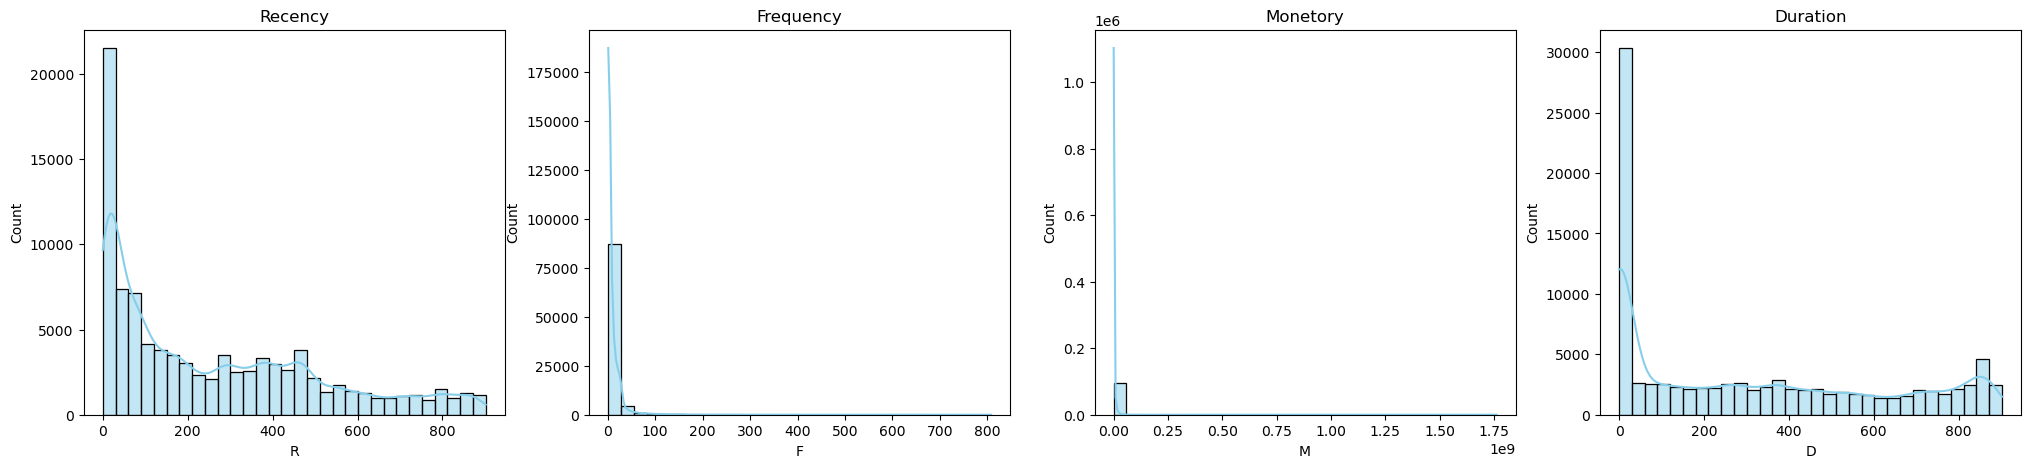

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1,len(box_cloumns), figsize=(25, 5))
axes = axes.flatten()
box_cloumns = ['R','F', 'M', 'D']
titles = ['Recency', 'Frequency', 'Monetory', 'Duration']
for i, col in enumerate(box_cloumns):
    sns.histplot(final_agg[col], kde=True, ax=axes[i], bins=30, color='skyblue')
    axes[i].set_title(titles[i])

plt.tight_layout
plt.show;



In [16]:
# Define the bins and corresponding labels for the 'R' (Recency) score
# 'R' represents the number of days since the last transaction.
# Customers are segmented into 5 groups based on recency:
#   - [0, 60): Score 5 (most recent)
#   - [60, 180): Score 4
#   - [180, 365): Score 3
#   - [365, 545): Score 2
#   - [545, inf): Score 1 (least recent)
final_agg['R_score'] = pd.cut(
    final_agg['R'],
    bins=[0, 60, 180, 365, 545, float('inf')],
    labels=[5, 4, 3, 2, 1],
    right=False
)

# Define the bins and corresponding labels for the 'F' (Frequency) score
# 'F' represents the number of transactions made by a customer.
# Customers are segmented into 5 groups based on frequency:
#   - [1, 2): Score 1 (least frequent)
#   - [2, 5): Score 2
#   - [5, 10): Score 3
#   - [10, 20): Score 4
#   - [20, inf): Score 5 (most frequent)
final_agg['F_score'] = pd.cut(
    final_agg['F'],
    bins=[1, 2, 5, 10, 20, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

# Define the bins and corresponding labels for the 'M' (Monetary) score
# 'M' represents the monetary value of transactions made by a customer.
# Customers are segmented into 5 groups based on monetary value:
#   - [0, 500_000): Score 1 (lowest spending)
#   - [500_000, 1_200_000): Score 2
#   - [1_200_000, 2_500_000): Score 3
#   - [2_500_000, 10_000_000): Score 4
#   - [10_000_000, inf): Score 5 (highest spending)
final_agg['M_score'] = pd.cut(
    final_agg['M'],
    bins= [0, 500_000, 1_200_000, 2_500_000, 10_000_000, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

# Define the bins and corresponding labels for an additional score 'D'
# This seems to be another segmentation based on recency ('R'), but with different groupings:
#   - [0, 1): Score 1 (most recent)
#   - [1, 180): Score 2
#   - [180, 365): Score 3
#   - [365, 545): Score 4
#   - [545, inf): Score 5 (least recent)
final_agg['D_score'] = pd.cut(
    final_agg['D'],
    bins=[0, 1, 180, 365, 545, float('inf')],
    labels=[1, 2, 3, 4, 5],
    right=False
)

final_agg


,UserID,R,F,M,D,R_score,F_score,M_score,D_score
0,0,360,2,800000,365,3,2,2,4
1,1,85,1,150000,0,4,1,1,1
2,3,216,7,290000,542,3,3,1,4
3,5,434,1,10000000,0,2,1,5,1
4,11,824,1,200000,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
94273,278376,1,1,10000,0,5,1,1,1
94274,278377,0,1,10000,0,5,1,1,1
94275,278378,0,1,50000,0,5,1,1,1
94276,278379,0,1,20000,0,5,1,1,1


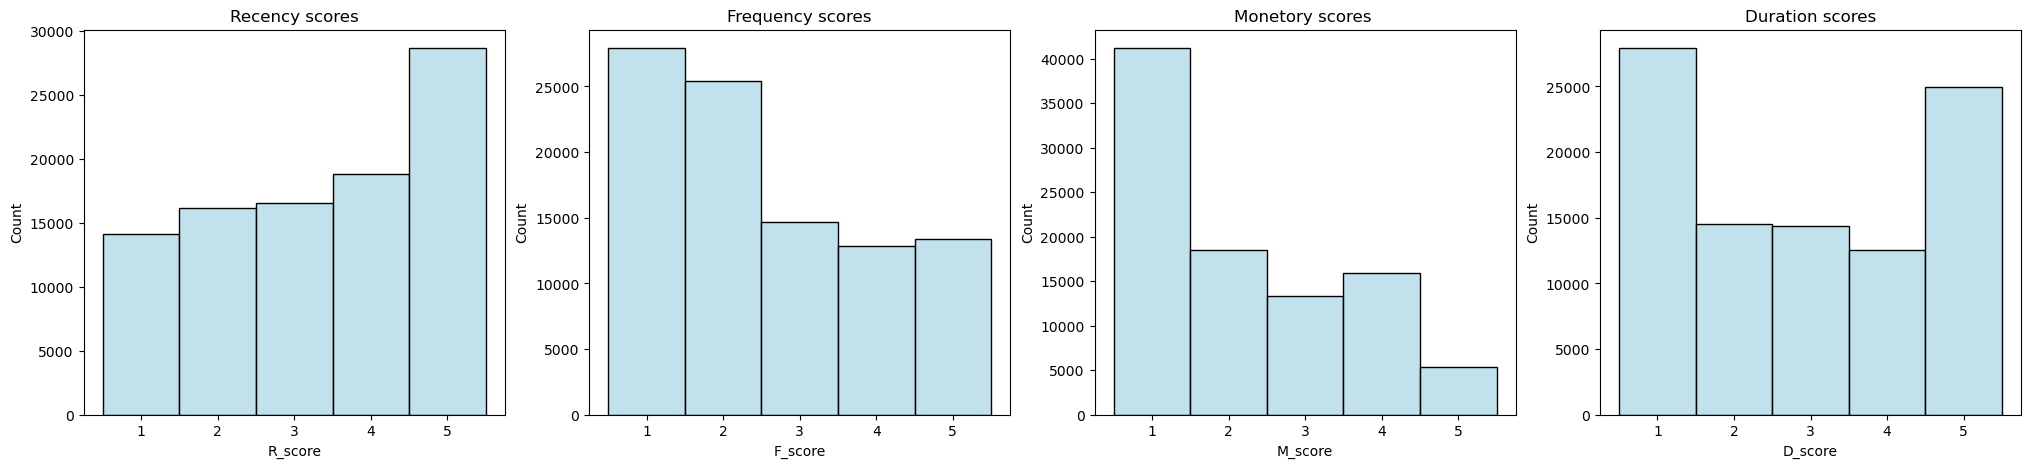

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

scores = ['R_score', 'F_score', 'M_score', 'D_score']
titles = ['Recency scores','Frequency scores', 'Monetory scores ', 'Duration scores']

fig, axes = plt.subplots(1, len(scores), figsize=(25,5))
axes = axes.flatten()

for i, col in enumerate(scores):
    sns.histplot(final_agg[col], kde=False,ax=axes[i], bins=5, color='lightblue')
    axes[i].set_title(titles[i])


plt.tight_layout
plt.show;

# <div style="text-align:center; border-radius:50px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Benefactors Data Processing</b></div>

In [18]:
df_bene = pd.read_csv('BenefactorsData.csv')
df_bene

,Unnamed: 0,UserID,Gender,State,BirthDate,ReferralSource
0,0,3,زن,تهران,1363-08-16,Acquaintances
1,1,8,مرد,تهران,1364-06-24,Acquaintances
2,2,14,مرد,تهران,1356-07-07,Acquaintances
3,3,17,زن,تهران,1325-07-23,Acquaintances
4,4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...,...
278381,278381,262139,مرد,تهران,1357-04-10,Application
278382,278382,262140,مرد,تهران,1354-10-01,Application
278383,278383,262141,مرد,فارس,1373-05-31,Application
278384,278384,262142,زن,البرز,NaN,Advertisements


In [19]:
df_bene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278386 entries, 0 to 278385
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      278386 non-null  int64 
 1   UserID          278386 non-null  int64 
 2   Gender          278149 non-null  object
 3   State           278386 non-null  object
 4   BirthDate       221817 non-null  object
 5   ReferralSource  278386 non-null  object
dtypes: int64(2), object(4)
memory usage: 12.7+ MB


In [20]:
df_ben2=df_bene.set_index('Unnamed: 0')
df_ben2

,UserID,Gender,State,BirthDate,ReferralSource
Unnamed: 0,,,,,
0,3,زن,تهران,1363-08-16,Acquaintances
1,8,مرد,تهران,1364-06-24,Acquaintances
2,14,مرد,تهران,1356-07-07,Acquaintances
3,17,زن,تهران,1325-07-23,Acquaintances
4,18,زن,تهران,1334-10-06,Acquaintances
...,...,...,...,...,...
278381,262139,مرد,تهران,1357-04-10,Application
278382,262140,مرد,تهران,1354-10-01,Application
278383,262141,مرد,فارس,1373-05-31,Application


In [21]:
pip install jdatetime -q

Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import jdatetime


def convert_persian_to_georgian_date(persian_date_str):
    try:
        persian_date = persian_date_str.split('-')
        year, month, day = int(persian_date[0]), int(persian_date[1]), int(persian_date[2])
        georgian_date = jdatetime.date(year, month, day).togregorian()
        return pd.to_datetime(georgian_date)
    except Exception as e:
        return pd.NaT
    
df_ben2['BirthDate'] = df_ben2['BirthDate'].apply(convert_persian_to_georgian_date)
df_ben2

# Force the conversion of 'BirthDate' to datetime if needed
df_ben2['BirthDate'] = pd.to_datetime(df_ben2['BirthDate'], errors='coerce')



In [23]:
df_ben2['BirthYear'] = df_ben2['BirthDate'].dt.year 

max_transaction_year = pd.to_datetime(agg_data['PaymentDate']).dt.year.max()

df_ben2['Age'] = max_transaction_year-df_ben2['BirthYear']

df_ben2


,UserID,Gender,State,BirthDate,ReferralSource,BirthYear,Age
Unnamed: 0,,,,,,,
0,3,زن,تهران,1984-11-07,Acquaintances,1984.0,34.0
1,8,مرد,تهران,1985-09-15,Acquaintances,1985.0,33.0
2,14,مرد,تهران,1977-09-29,Acquaintances,1977.0,41.0
3,17,زن,تهران,1946-10-15,Acquaintances,1946.0,72.0
4,18,زن,تهران,1955-12-28,Acquaintances,1955.0,63.0
...,...,...,...,...,...,...,...
278381,262139,مرد,تهران,1978-07-01,Application,1978.0,40.0
278382,262140,مرد,تهران,1975-12-22,Application,1975.0,43.0
278383,262141,مرد,فارس,1994-08-22,Application,1994.0,24.0


In [24]:
skewness = df_ben2[['Age']].skew().to_frame('skewness').T
kurtosis = df_ben2[['Age']].kurtosis().to_frame('kurtosis').T
describe = df_ben2[['Age']].describe()
total_describe = pd.concat([describe, kurtosis, skewness])
total_describe

,Age
count,221814.000000
mean,40.625547
std,13.969318
min,-241.000000
25%,32.000000
50%,38.000000
75%,48.000000
max,107.000000
kurtosis,4.674715
skewness,0.544092


In [25]:
df_ben3= df_ben2.copy()
df_ben3['Age']= df_ben3['Age'].apply(lambda x: x if 0 <= x <= 100 else None )

In [26]:
df_ben3['Age'].isnull().sum()

56625

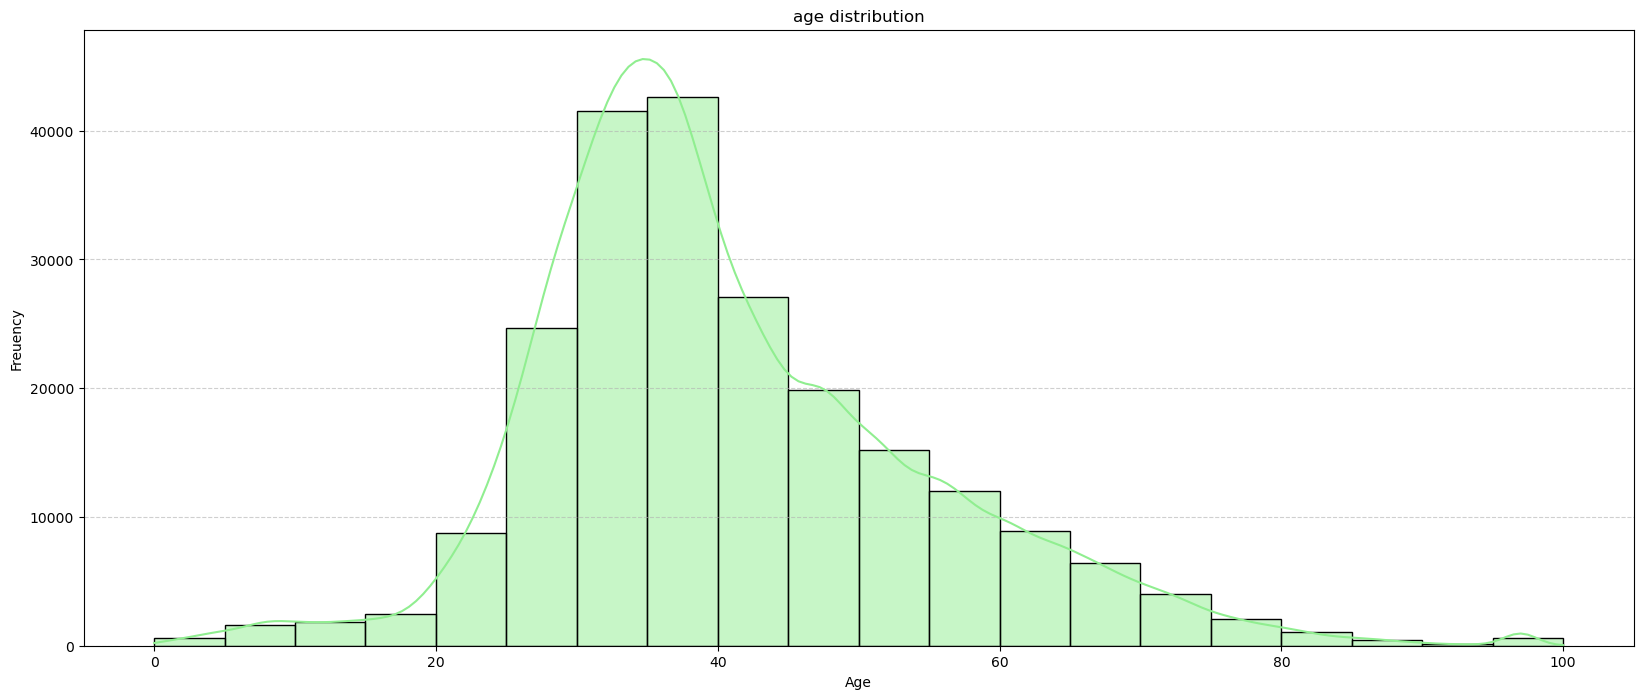

In [31]:
filtered_age = df_ben3['Age'].dropna()

plt.figure(figsize=(20, 8))
sns.histplot(filtered_age, kde=True, bins=20, color='lightgreen')
plt.title('age distribution')
plt.xlabel('Age')
plt.ylabel('Freuency')
plt.grid(axis= 'y', linestyle= '--', alpha= 0.6)
plt.show;

